In [12]:
import numpy as np
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.diagnostic as dg
import seaborn as sns
import pandas as pd
import scipy as sp
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
data = sm.datasets.macrodata.load()
macro_data = data.data[['year', 'quarter', 'realgdp', 'cpi']]
macro_df = pd.DataFrame.from_records(macro_data)
macro_df.head()

,year,quarter,realgdp,cpi
0,1959.0,1.0,2710.349,28.98
1,1959.0,2.0,2778.801,29.15
2,1959.0,3.0,2775.488,29.35
3,1959.0,4.0,2785.204,29.37
4,1960.0,1.0,2847.699,29.54


In [17]:
reg = smf.ols('realgdp ~ cpi ', data=macro_df).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                realgdp   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     7307.
Date:                Sun, 04 Nov 2018   Prob (F-statistic):          5.45e-160
Time:                        15:24:08   Log-Likelihood:                -1559.4
No. Observations:                 203   AIC:                             3123.
Df Residuals:                     201   BIC:                             3129.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1782.7316     73.604     24.221      0.000    1637.597    1927.867
cpi           51.7573      0.605     85.481      0.000      50.563      52.951
==============================================================================
Omnibus:                      600.816   Durbin-Watson:                   0.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.099
Skew:                          -0.179   Prob(JB):                     0.000117
Kurtosis:                       1.582   Cond. No.                         242.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

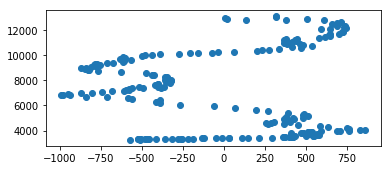

In [20]:
pred_val = reg.fittedvalues.copy()
true_val = macro_df['realgdp'].values.copy()
residual = true_val - pred_val
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, pred_val)

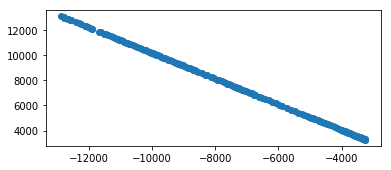

In [27]:
y_hat = reg.fittedvalues.copy()
y = macro_df['cpi'].values.copy()
residual = y - y_hat
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(residual, y_hat)

In [22]:
sms.linear_harvey_collier(reg)

Ttest_1sampResult(statistic=1.2196325527760428, pvalue=0.22404772734893252)

In [26]:
_, pval, __, f_pval = dg.het_breuschpagan(residual, macro_df[['realgdp', 'cpi']])
pval, f_pval

(3.352632960129247e-45, 9.23573240015048e-173)

### Normality

0.9131776002868653

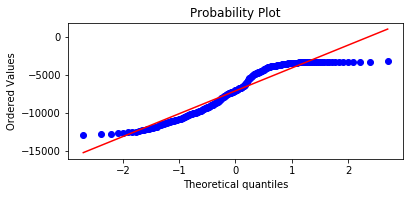

In [25]:
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot(residual, plot=ax, fit=True)
r**2